In [ ]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../../preamble.md'))

In [ ]:
# %autosave 0
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib import animation

# Optimización

La **optimización** es el procedimiento para:

> Encontrar la mejor solución para un problema dentro de un conjunto de posibilidades

La optimización es un área bastante estudiada de las matemáticas, y algunos problemas de optimización requieren de soluciones muy específicas

El objetivo de este cuadernillo es dar un vistazo general a los problemas de optimización que podemos resolver usando las herramientas del módulo `scipy.optimize`

# Problema general de optimización

Usualmente un problema matemático de optimización se formula como

$$
\begin{align}
\min_x &f(x) \nonumber \\
\text{sujeto a: } & g_i(x) = 0, i=1,2\ldots, I \\ \nonumber 
& h_j(x) \leq 0, j=1,2,\ldots J \nonumber
\end{align}
$$

donde 
- $x \in \mathbb{R}^D$ se conoce como **variable o variables de decisión**
- $f : \mathbb{R}^D \to \mathbb{R}$ se conoce como **función objetivo**
- $g_i : \mathbb{R}^D \to \mathbb{R}$ se conocen como **restricciones de igualdad** 
- $h_j : \mathbb{R} \to \mathbb{R}^H$ se conocen como **restricciones de desigualdad**

El problema de optimización es entonces

> La búsqueda de un valor extremo de la función objetivo dentro del espacio definido por las restricciones

Un valor extremo puede ser un mínimo o un máximo. En un problema particular usualmente sólo nos interesa uno de estos casos. Dado que
$$
\max f(\vec x) \equiv \min - f(\vec x),
$$
entonces hablaremos sólo de minimización sin pérdida de generalidad

## Clasificación de problemas de optimización

Estudiando algunas características del problema podemos seleccionar más facilmente un algoritmo  apropiado para resolverlo

Por ejemplo
- Función objetivo de una variable ($D=1$) versus multi-variable ($D>1$)
> Esto define la dimensionalidad o escala del problema
- Existencia de restricciones de igualdad y/o desigualdad
> Algunos algoritmos sólo pueden resolver problemas sin restricciones
- Función objetivo y restricciones lineales o no-lineales en $x$
> Si todas las funciones son lineales entonces se pueden usar técnicas de **programación lineal**. Esto problemas son más simples que los no lineales
- Función objetivo convexa o no-convexa
> Una función no-convexa (derecha) puede tener múltiples mínimos locales. Por el contrario una función convexa (izquierda) tiene un único mínimo

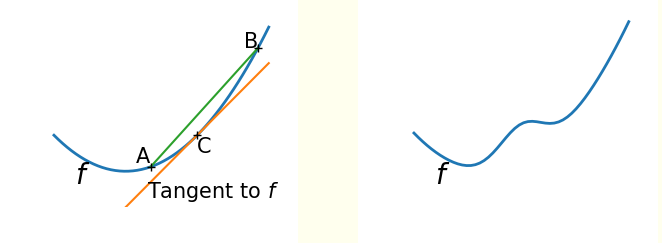

- Función objetivo continua y diferenciable versus no diferenciable
> Muchos métodos se basan en el gradiente de la función de costo para encontrar la solución óptima. Si la función objetivo no es suave y no puede diferenciarse entonces no podemos usar dichos métodos


 


# Resolviendo un problema de optimización

Consideremos primero el caso e una función objetivo continua y derivable de una variable


## Solución algebraica


La forma más clásica para obtener la solución en este caso es 

> Encontrar las raices (ceros) de la derivada/gradiente de $f$

Es decir

$$
\nabla f (x^*) = \begin{pmatrix} \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_D} \end{pmatrix} = \vec 0
$$

Estas soluciones se conocen como **puntos estacionarios** de $f$, esto incluye los mínimos, máximos y puntos silla

Luego si las segunda derivada o matriz Hessiana de $f$

$$
H_{ij}^f (x)  = \frac{\partial^2 f}{\partial x_i \partial x_j} (x^*)
$$

es positiva o semi-definida positiva  entonces $x^*$ es un **mínimo local**


**Receta**
1. Obtener $x^*$ tal que $\nabla f (x^*)=0$
1. Probar que es un mínimo el Hessiano

**Limitación** 

Sólo sirve si podemos despejar una expresión análitica de $x$ a partir de $\nabla f (x^*)=0$

### Ejemplo

Consideremos el siguiente problema

$$
\min_x x^2 - 2x
$$

Igualando la primera derivada de la función objectivo a cero tenemos que $ 2x - 2 = 0$, es decir $x=1$ es un punto estacionario

La segunda derivada es mayor que cero por lo tanto corresponde a un mínimo

Considere ahora el siguiente problema no-convexo

$$
f(x) = x^2 - 2x + 5 \sin(2x)
$$

La derivada en este caso es

$$
\frac{\partial f}{\partial x} = 2x - 2 + 10 \cos(2x) = 0
$$

En este caso no es posible despejar analiticamente $x$ sin hacer más simplificaciones o supuestos

## Búsqueda exhaustiva de la mejor solución

Podemos encontrar la mejor solución probando una gran cantidad de "soluciones candidatas" de forma numérica y guardando la mejor

Esto se conoce como "método de fuerza bruta"
1. Definimos una grilla para nuestro espacio de parámetros (dominio y resolución)
1. Para cada elemento de la grilla calculamos la función de costo
1. Buscamos el elemento con menor función de costo

**Ventaja** 

Si la resolución es lo suficientemente fina podemos encontrar el mínimo global del dominio aunque la función sea no-convexa

**Desventaja** 

El costo computacional crece rapidamente con la dimensión de $x$, **explosión combinatorial**

Esto lo hace infactible en la mayoría de los casos reales

## Método iterativos

En lugar de evaluar todo el espacio de posibilidades los métodos iterativos parten de una solución inicial y la refinan paso a paso

En cada paso los métodos iterativos buscan la dirección que más los acerque a la solución óptima



### Método de Newton

Sea el valor actual de la variable de decisión $x_t$

Podemos escribir el valor que tendrá en el siguiente paso como

$$
x_{t+1} = x_t + \Delta x
$$

Queremos encontrar el mejor $\Delta x$ según nuestra función objetivo

Consideremos la aproximación de Taylor de segundo orden de $f$
$$
f(x_{t} + \Delta x) \approx f(x_t) + \nabla f (x_t) \Delta x + \frac{1}{2} \Delta x^T H_f (x_t) \Delta x 
$$
Derivando en función de $\Delta x$ e igualando a cero tenemos
$$
\begin{align}
\nabla f (x_t)  +  H_f (x_t) \Delta x &= 0 \nonumber \\
\Delta x &= - [H_f (x_t)]^{-1}\nabla f (x_t)  \nonumber \\
x_{t+1} &= x_{t} - [H_f (x_t)]^{-1}\nabla f (x_t)  \nonumber 
\end{align}
$$

> Se obtiene una regla iterativa en función del **Gradiente** y del **Hessiano** de $f$

Notar que
- La solución depende de $x_0$ el valor inicial de la variable de decisión
- Supusimos que la aproximación de segundo orden es "buena"
- Si nuestro modelo tiene $M$ parámetros el Hessiano será una matriz de $M\times M$

### Gradiente descendente (GD)

Si el Hessiano es prohibitivo podemos usar una aproximación de primer orden

El método más clásico es el **gradiente descendente**
$$
x_{t+1} = x_{t} - \eta \nabla f (x_t)
$$

donde hemos reemplazado el Hessiano por una constante $\eta$ llamado "paso" o "tasa de aprendizaje"



### Ejemplo: Influencia de la tasa de aprendizaje con GD

¿Cómo cambia la optimización con distintos $\eta$?

- Un $\eta$ muy pequeño hará que la convergencia sea muy lenta
- Un $\eta$ muy grande hará que la optimización sea inestable o que diverja

Consideremos nuevamente la optimización de 
$$
f(x) = x^2 - 2x
$$

En el siguiente ejemplo
- Cada punto azul es una solución
- El gráfico superior es la función objetivo y la linea punteada la solución óptima
- El gráfico inferior es el gradiente de al función objetivo y la linea punteada roja son los ceros de la derivada

Pruebe $\eta \in [0.001, 0.01, 0.1, 1.]$

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)
x_plot = np.linspace(-4, 6, num=100)
f = lambda x : x**2 - 2*x
df = lambda x : 2*x - 2

ax[0].plot(x_plot, f(x_plot))
ax[0].plot([1]*2, [-1, 22], 'r--')
ax[1].plot(x_plot, -df(x_plot))
ax[1].plot(x_plot, [0]*len(x_plot), 'r--')

x = 10*np.random.rand(10) - 4.
sc = ax[0].scatter(x, f(x), s=100)

ax[1].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')
ax[1].set_ylabel(r'$-\nabla f(x)$')

eta = 0.01

def update(n):
    ax[0].set_title(f"Iteración {n}/100")
    x = sc.get_offsets()[:, 0]
    x -= eta*df(x)
    sc.set_offsets(np.c_[x, f(x)])
    
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False, blit=True)

### Ejemplo: Mínimos locales

Consideremos la función no convexa

$$
f(x) = x^2 - 2x + 5 \sin(2x)
$$

En el siguiente ejemplo se usa gradiente descedente con 10 soluciones iniciales distintas  

> Note como la solución final depende fuertemente de la solución inicial

No hay garantía de que la solución obtenida sea el mínima global del problema

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)
x_plot = np.linspace(-4, 6, num=100)
f = lambda x : x**2 - 2*x + 5*np.sin(2*x)
df = lambda x : 2*x - 2 + 10*np.cos(2*x)

ax[0].plot(x_plot, f(x_plot))
ax[1].plot(x_plot, -df(x_plot))
ax[1].plot(x_plot, [0]*len(x_plot), 'r--')

x = 10*np.random.rand(10) - 4.
sc = ax[0].scatter(x, f(x), s=100)

ax[1].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')
ax[1].set_ylabel(r'$-\nabla f(x)$')

eta = 0.01

def update(n):
    ax[0].set_title(f"Iteración {n}/100")
    x = sc.get_offsets()[:, 0]
    x -= eta*df(x)
    sc.set_offsets(np.c_[x, f(x)])
    
anim = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False, blit=True)

# Módulo [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#optimization-scipy-optimize)


## Función `minimize`


La principal función de este módulo es `minimize` la cual engloba a una larga lista de optimizadores

Sus argumentos principales son

```python
>>> from scipy.optimize import minimize
>>> minimize(fun, # Función objetivo 
             x0, # Valor inicial de la variable de decisión
             args=(), # Argumentos adicionales de fun
             method=None, # El método de optimización a usar (más detalles a continuación)
             jac=None, # Función que calcula la matriz de primeras derivadas (jacobiano)
             bounds=None, # Secuencia de tuplas (min, max) con cotas para x 
             constraints=(), # Diccinario o lista de restricciones (más detalles a continuación)
             tol=None, # Tolerancia para el término de la optimización
             callback=None, # Una función que se ejecuta luego de cada iteración
             options=None, # Diccionario con las opciones especificas para cada método
             ...
            )
```

La función objetivo debe ser de la forma

```python
def fun(x, *args):
    ...
    return f # Esto es un escalar (float)
```

La función de primeras derivadas debe ser de la forma

```python
def jac(x, *args):
    # x: Variable de decisión
    # *args argumentos adicionales (los mismos que fun)
    ...
    return dx # Esto es un arreglo con la misma dimesión de x
```

Si no se especifica `jac` las derivadas se calcularán de forma numérica, lo cual es menos eficiente. No todos los métodos requieren de primeras derivadas

La función `optimize` retorna un objeto de tipo [`OptimizeResult`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)

Sus atributos más importantes son

- `x`: Mejor valor encontrado de la variable de decisión
- `fun`: Valor de la función objetivo en el óptimo encontrado
- `jac`: Valor de la matriz de primeras derivadas en el óptimo encontrado
- `success`: Booleano que indica si la optimización se llevó a cabo con exito
- `message:` Mensaje indicando la razón de término, útil para debuggear

## Métodos de optimización

A continuación revisaremos los principales métodos implemenetados en `optimize`

### Optimización sin restricciones 

Optimizadores que usan gradientes, ya sea numérico o especificado con `jac`. Si la derivada puede obtenerse analiticamente y es confiable los siguientes métodos tendrán un desempeño superior a las alternativas
- [`method=CG`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-cg.html#optimize-minimize-cg): Gradiente conjugado. Es una versión de GD con tasa de aprendizaje adaptiva
- [`method=BFGS`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html#optimize-minimize-bfgs): Es un método de tipo [quasi-Newton](https://en.wikipedia.org/wiki/Quasi-Newton_method) con Hessiano inverso aproximado a cada paso. Es el método por defecto en optimize y es en general una buena opción
    
Optimizadores que no usan gradientes. Estos métodos pueden usarse cuando la función objetivo es no-derivable o demasiado ruidosa 
- [`method=Nelder-Mead`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead): Es una heurística tipo simplex. [Animación que muestra su funcionamiento](https://www.youtube.com/watch?v=HUqLxHfxWqU)
- [`method=Powell`](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-powell.html#optimize-minimize-powell): Algoritmo de búsqueda de linea siguiendo una dirección a la vez. [Animación que muestra su funcionamiento](https://www.youtube.com/watch?v=4TYJGihyuDg)

### Ejercicio

Resuelva el problema del ejemplo anterior usando `scipy.optimize`

Considere las siguientes soluciones iniciales $x_0 \in [-4, 0, 4, 6]$

Muestre el mejor valor de $x$, el mejor valor de la función objetivo y el *status* de término

In [ ]:
# Complete aquí


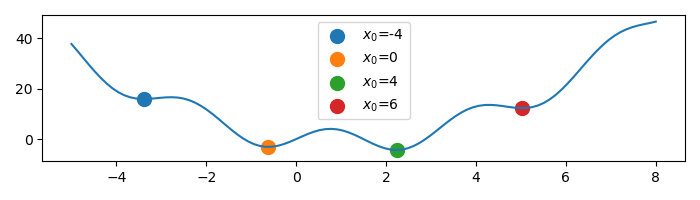

In [ ]:
YouTubeVideo_formato('Ku3yWFM_iQM')

### Ejercicio

Sea la función del "dromedario invertido" definida como

$$
f(x, y) = (4 - 2.1 x^2 + \frac{1}{3} x^4) x^2 + x y + 4 y^2 (y^2 - 1) 
$$

Encuentre el mínimo usando `minimize`

- Implemente la función de costo y su primera derivada
- Considere las siguientes soluciones iniciales $[1, 1]$ y $[-1, -1]$
- Muestre el mejor valor de $x$, el mejor valor de la función objetivo y el *status* de término
- (Opcional) Muestre graficamente la función y las soluciones encontradas

In [ ]:
# Complete aquí


In [ ]:
YouTubeVideo_formato('rApw8Zhy1Kg')

### Optimización con restricciones

- `method=L-BFGS-B`: Similar a BFGS pero permite añadir cotas para la variable de decisión
- `method=SLSQP`: *Sequential Least Squares Programming*. Este método acepta cotas, restricciones de igualdad y restricciones de desigualdad

Las restricciones se entregan como una tupla

Cada restricción es un diccionario con las llaves `type` y `fun` para especificar el tipo (string `eq` o `ineq`) y la función

Opcionalmente se puede especificar `jac`, la matriz de primeras derivadas de `fun` y `arg` una tupla con argumentos adicionales para `fun` y `jac`

- Las restricciones de igualdad deben ser siempre de la forma $g(x) = 0$
- Las restricciones de desigualdad deben ser siempre de la forma $h(x) \geq 0 $

Por ejemplo si tengo la siguiente restricción

$$
x^2 \geq 1 + 2x
$$

```python
>>> h1 = {'type': 'ineq', 
          'fun' : lambda x: x**2 - 2*x -1,
          'jac' : lambda x: np.array([2*x - 2])}
```




### Ejercicio

Sea la siguiente función de costo con dos variables de decisión
$$
\min f(x, y) = -(2xy+2x-x^2-2y^2) 
$$
sujeta a 
$$
x^3 - y = 0 ~\wedge~y-(x-1)^4-2 \geq 0 
$$
donde
$$
0.5\leq x \leq 1.5 ~\wedge~ 1.5 \leq y \leq 2.5
$$

Es decir que tenemos restrucciones de igualdad, restricciones de desigualdad y cotas

- Escriba la función de costo, restricciones y cotas
- Muestre la solución del problema de optimización obtenida con BFGS (ignorando restricciones y cotas), L-BFGS-B (ignorando restricciones) y SLSQP. Use $x_0 = 0$ y $y_0 = 1$ como solución inicial
- (Opcional) Muestre graficamente la solución del problema

In [ ]:
# Complete aquí


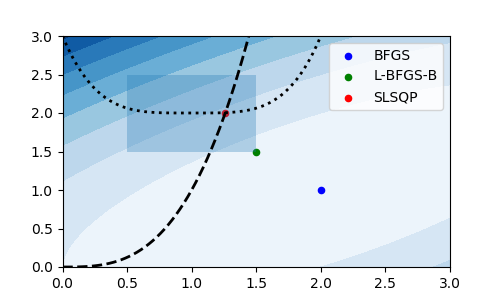

En la gráfica
- El gradiente de color es la función objetivo
- La sombra rectangular son las cotas
- La linea punteada es la restricción de igualdad
- La linea de puntos es la restricción de desigualdad

In [ ]:
YouTubeVideo_formato('60nw7S7eo8c')

## Consideraciones prácticas
- Escoger apropiadamente nuestro optimizador dependiendo del problema
- Probar varias soluciones iniciales si nuestro problema no es convexo
- Revisar la convergencia de los algoritmos



# Tópicos extra

- [Comparativa detallada entre los distintos métodos de optimización](https://scipy-lectures.org/advanced/mathematical_optimization/index.html) 
- [Raices de una función](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)
- [Mínimos cuadrados no lineal y con cotas](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) 
- [Programación lineal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy.optimize.linprog)